Import the required Python libraries

In [59]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

dataset

In [60]:
dataset = pd.read_csv('Data/Property Prices in Tunisia.csv')
dataset

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449
...,...,...,...,...,...,...,...,...,...
12743,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,3200000.0,Tunis,Sidi Bou Said,6.505150
12744,Appartements,1.0,1.0,100.0,À Louer,600.0,Tunis,Autres villes,2.778151
12745,Maisons et Villas,3.0,1.0,760.0,À Vendre,1950000.0,Tunis,La Marsa,6.290035
12746,Maisons et Villas,3.0,1.0,190.0,À Vendre,240000.0,Tunis,La Marsa,5.380211


In [61]:
print(dataset.head().to_markdown())

|    | category              |   room_count |   bathroom_count |   size | type     |   price | city   | region        |   log_price |
|---:|:----------------------|-------------:|-----------------:|-------:|:---------|--------:|:-------|:--------------|------------:|
|  0 | Terrains et Fermes    |           -1 |               -1 |     -1 | À Vendre |  100000 | Ariana | Raoued        |     5       |
|  1 | Terrains et Fermes    |           -1 |               -1 |     -1 | À Vendre |  316000 | Ariana | Autres villes |     5.49969 |
|  2 | Appartements          |            2 |                1 |     80 | À Louer  |     380 | Ariana | Autres villes |     2.57978 |
|  3 | Locations de vacances |            1 |                1 |     90 | À Louer  |      70 | Ariana | Autres villes |     1.8451  |
|  4 | Appartements          |            2 |                2 |    113 | À Vendre |  170000 | Ariana | Ariana Ville  |     5.23045 |


Analyse exploratoire des données :
Maintenant, il est temps de comprendre les données. Nous devrions diagnostiquer les données pour toute divergence en effectuant une analyse exploratoire des données. Nous devrions procéder comme suit :

Nous pouvons vérifier les dimensions des données avec l'attribut

In [62]:
dataset.shape

(12748, 9)

Interprétation

Nous pouvons voir que nos données ont 10 lignes et 10 colonnes.

In [63]:
dataset.head()

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449


derenne colonne et des lignes

In [64]:
dataset.tail()

,category,room_count,bathroom_count,size,type,price,city,region,log_price
12743,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,3200000.0,Tunis,Sidi Bou Said,6.505150
12744,Appartements,1.0,1.0,100.0,À Louer,600.0,Tunis,Autres villes,2.778151
12745,Maisons et Villas,3.0,1.0,760.0,À Vendre,1950000.0,Tunis,La Marsa,6.290035
12746,Maisons et Villas,3.0,1.0,190.0,À Vendre,240000.0,Tunis,La Marsa,5.380211
12747,Maisons et Villas,2.0,1.0,70.0,À Louer,500.0,Tunis,Sidi Bou Said,2.698970



Nous pouvons voir qu'il y a beaucoup de divergences dans l'ensemble de données.
Exemple: colonne room_count il y a des attribues négative
         colonne bathroom_count il y a des valeurs négative.


Nous pouvons obtenir un résumé concis de l'ensemble de données avec la méthode dataset.info() . Cette méthode imprime des informations sur un DataFrame, y compris le dtype d'index et les dtypes de colonne, les valeurs non nulles et l'utilisation de la mémoire.

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748 entries, 0 to 12747
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        12748 non-null  object 
 1   room_count      12748 non-null  float64
 2   bathroom_count  12748 non-null  float64
 3   size            12748 non-null  float64
 4   type            12748 non-null  object 
 5   price           12748 non-null  float64
 6   city            12748 non-null  object 
 7   region          12748 non-null  object 
 8   log_price       12748 non-null  float64
dtypes: float64(5), object(4)
memory usage: 896.5+ KB



Nous pouvons voir que cette méthode imprime les informations de toutes les colonnes. Plusieurs colonnes contiennent des valeurs manquantes. Nous avons vu que les colonnes contiennent des valeurs manquantes et invalides sont codées différemment. Nous devons donc approfondir cette question.

Nous pouvons vérifier les types de données de chaque colonne de la trame de données avec l'attribut df.dtypes . La commande ci-dessus renvoie le type de données de chaque colonne.

In [66]:
dataset.dtypes

category           object
room_count        float64
bathroom_count    float64
size              float64
type               object
price             float64
city               object
region             object
log_price         float64
dtype: object

In [67]:
dataset.describe()

,room_count,bathroom_count,size,price,log_price
count,12748.000000,12748.000000,12748.000000,1.274800e+04,12748.000000
mean,1.759649,0.759884,130.896219,1.601575e+07,4.374245
std,2.171468,1.264812,184.074990,1.016644e+09,1.389788
min,-1.000000,-1.000000,-1.000000,1.000000e+01,1.000000
25%,-1.000000,-1.000000,-1.000000,8.500000e+02,2.929419
50%,2.000000,1.000000,95.000000,8.975000e+04,4.953033
75%,3.000000,1.000000,150.000000,2.600000e+05,5.414973
max,20.000000,10.000000,2000.000000,1.000000e+11,11.000000


In [68]:
dataset.columns 

Index(['category', 'room_count', 'bathroom_count', 'size', 'type', 'price',
       'city', 'region', 'log_price'],
      dtype='object')

In [69]:
index_with_nan = dataset.index[dataset.isnull().any(axis=1)]
index_with_nan
dataset.drop(index_with_nan,0, inplace=True)
dataset

C:\Users\faten\AppData\Local\Temp\ipykernel_14732\365672669.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset.drop(index_with_nan,0, inplace=True)


,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449
...,...,...,...,...,...,...,...,...,...
12743,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,3200000.0,Tunis,Sidi Bou Said,6.505150
12744,Appartements,1.0,1.0,100.0,À Louer,600.0,Tunis,Autres villes,2.778151
12745,Maisons et Villas,3.0,1.0,760.0,À Vendre,1950000.0,Tunis,La Marsa,6.290035
12746,Maisons et Villas,3.0,1.0,190.0,À Vendre,240000.0,Tunis,La Marsa,5.380211


In [70]:
# des valeurs manquantes?
print(dataset.isnull().values.any())

False


In [71]:
dataset.isnull()

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
12743,False,False,False,False,False,False,False,False,False
12744,False,False,False,False,False,False,False,False,False
12745,False,False,False,False,False,False,False,False,False
12746,False,False,False,False,False,False,False,False,False


In [72]:
dataset["room_count"].replace(-1, 1, inplace=True)


In [73]:
dataset

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449
...,...,...,...,...,...,...,...,...,...
12743,Terrains et Fermes,1.0,-1.0,-1.0,À Vendre,3200000.0,Tunis,Sidi Bou Said,6.505150
12744,Appartements,1.0,1.0,100.0,À Louer,600.0,Tunis,Autres villes,2.778151
12745,Maisons et Villas,3.0,1.0,760.0,À Vendre,1950000.0,Tunis,La Marsa,6.290035
12746,Maisons et Villas,3.0,1.0,190.0,À Vendre,240000.0,Tunis,La Marsa,5.380211


In [74]:
dataset["bathroom_count"].replace(-1, 1, inplace=True)
dataset["size"].replace(-1, 100, inplace=True)

In [75]:
dataset

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,1.0,1.0,100.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,1.0,1.0,100.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449
...,...,...,...,...,...,...,...,...,...
12743,Terrains et Fermes,1.0,1.0,100.0,À Vendre,3200000.0,Tunis,Sidi Bou Said,6.505150
12744,Appartements,1.0,1.0,100.0,À Louer,600.0,Tunis,Autres villes,2.778151
12745,Maisons et Villas,3.0,1.0,760.0,À Vendre,1950000.0,Tunis,La Marsa,6.290035
12746,Maisons et Villas,3.0,1.0,190.0,À Vendre,240000.0,Tunis,La Marsa,5.380211


In [76]:
dataset.isnull().sum()

category          0
room_count        0
bathroom_count    0
size              0
type              0
price             0
city              0
region            0
log_price         0
dtype: int64

In [77]:
from pylab import *

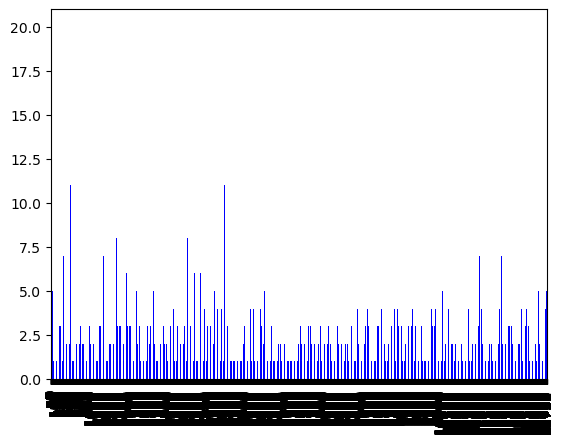

In [79]:
dataset['room_count'].plot(kind='bar',cmap='winter')
plt.show()

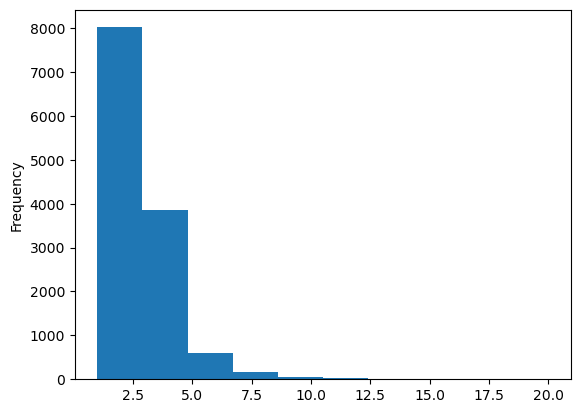

In [82]:
dataset['room_count'].plot(kind='hist')

plt.show()

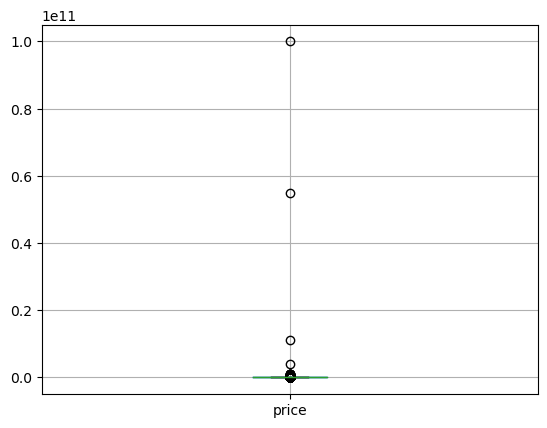

In [81]:
dataset.boxplot(column='price')

plt.show()

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

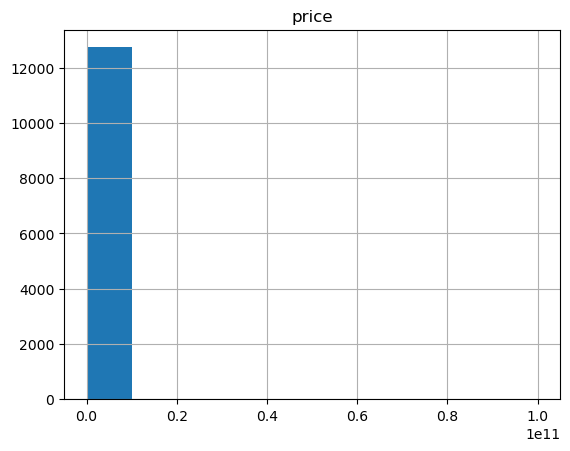

In [87]:

dataset.hist(column='price')

array([[<AxesSubplot:title={'center':'log_price'}>]], dtype=object)

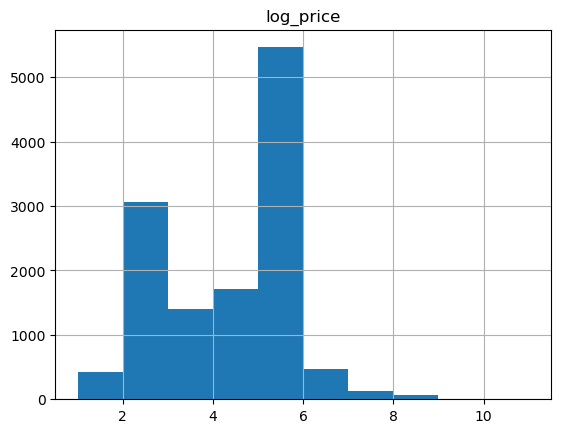

In [88]:
dataset.hist(column='log_price')

In [89]:
dataset["log_price"].describe()

count    12748.000000
mean         4.374245
std          1.389788
min          1.000000
25%          2.929419
50%          4.953033
75%          5.414973
max         11.000000
Name: log_price, dtype: float64

Text(0, 0.5, 'price')

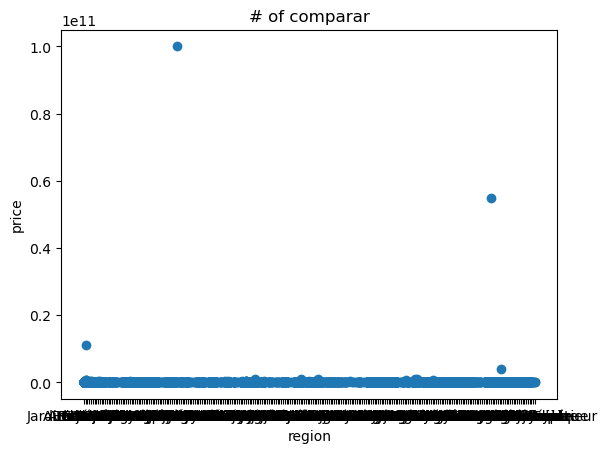

In [95]:
plt.scatter(dataset["region"], dataset["price"]);
plt.title("# of comparar")
plt.xlabel("region")
plt.ylabel("price")